<a href="https://colab.research.google.com/github/ori112/ad-clicks-predictions/blob/main/ad_clicks_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
#importing required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [4]:
#reading project file
df = pd.read_csv(r'/content/advertising.csv')

In [5]:
#inspecting the df
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [6]:
#inspecting df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [7]:
#checking for null values
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [8]:
#converting time stamp to additional features
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df["month"] = df["Timestamp"].dt.month
df['Day of month'] = df['Timestamp'].dt.day
df['Day of week'] = df['Timestamp'].dt.dayofweek
df['Hour'] = df['Timestamp'].dt.hour
df = df.drop(['Timestamp'], axis=1)

In [114]:
#inspecting df after creating new columns
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,month,Day of month,Day of week,Hour
0,68.95,35,61833.90,256.09,0,0,3,27,6,0
1,80.23,31,68441.85,193.77,1,0,4,4,0,1
2,69.47,26,59785.94,236.50,0,0,3,13,6,20
3,74.15,29,54806.18,245.89,1,0,1,10,6,2
4,68.37,35,73889.99,225.58,0,0,6,3,4,3


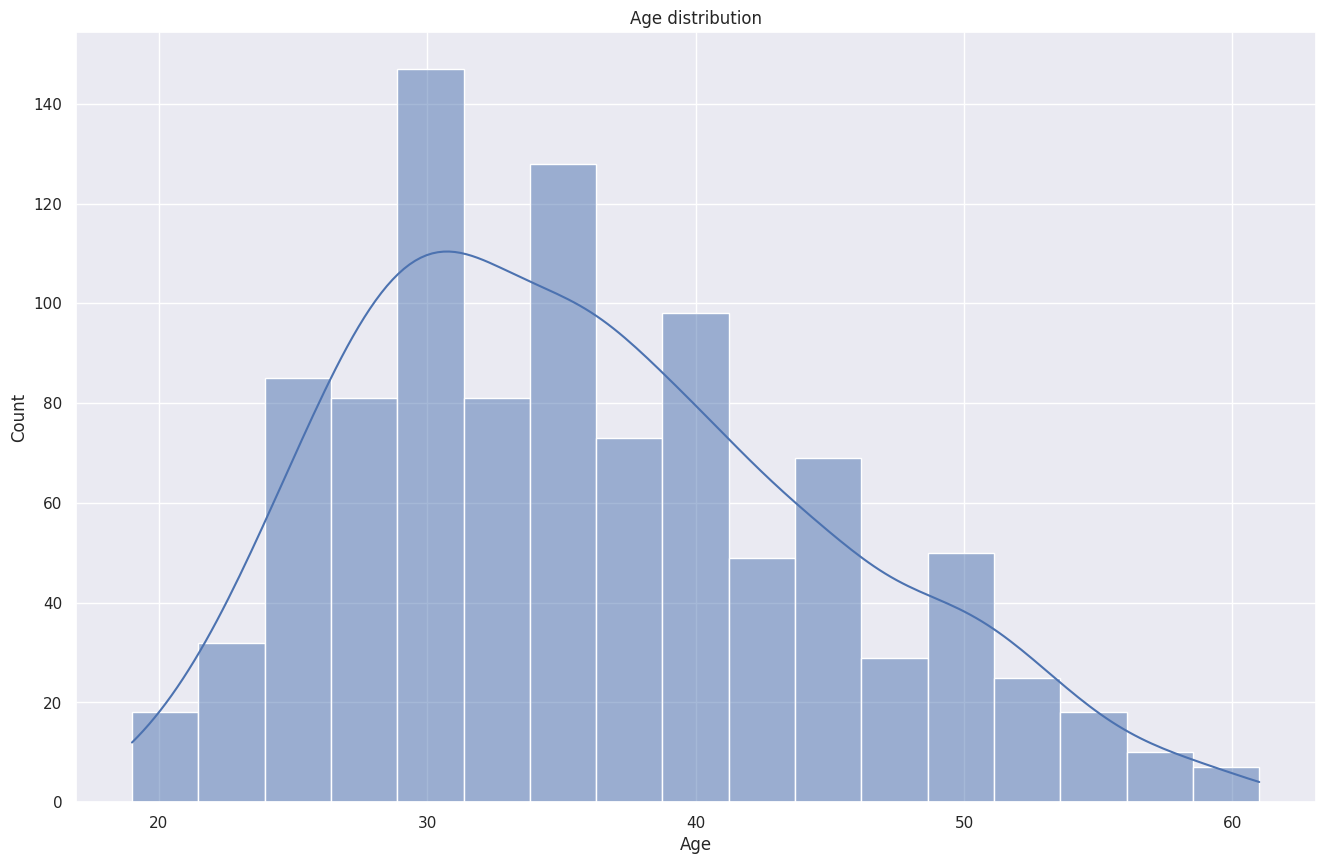

In [113]:
#inspecting the ditstribution of Age in df
plt.figure(figsize=(16,10))
plt.title("Age distribution")
sns.set_theme(style = "darkgrid")
sns.histplot(data=df, x="Age", kde=True)
plt.show()

<Figure size 1000x600 with 0 Axes>

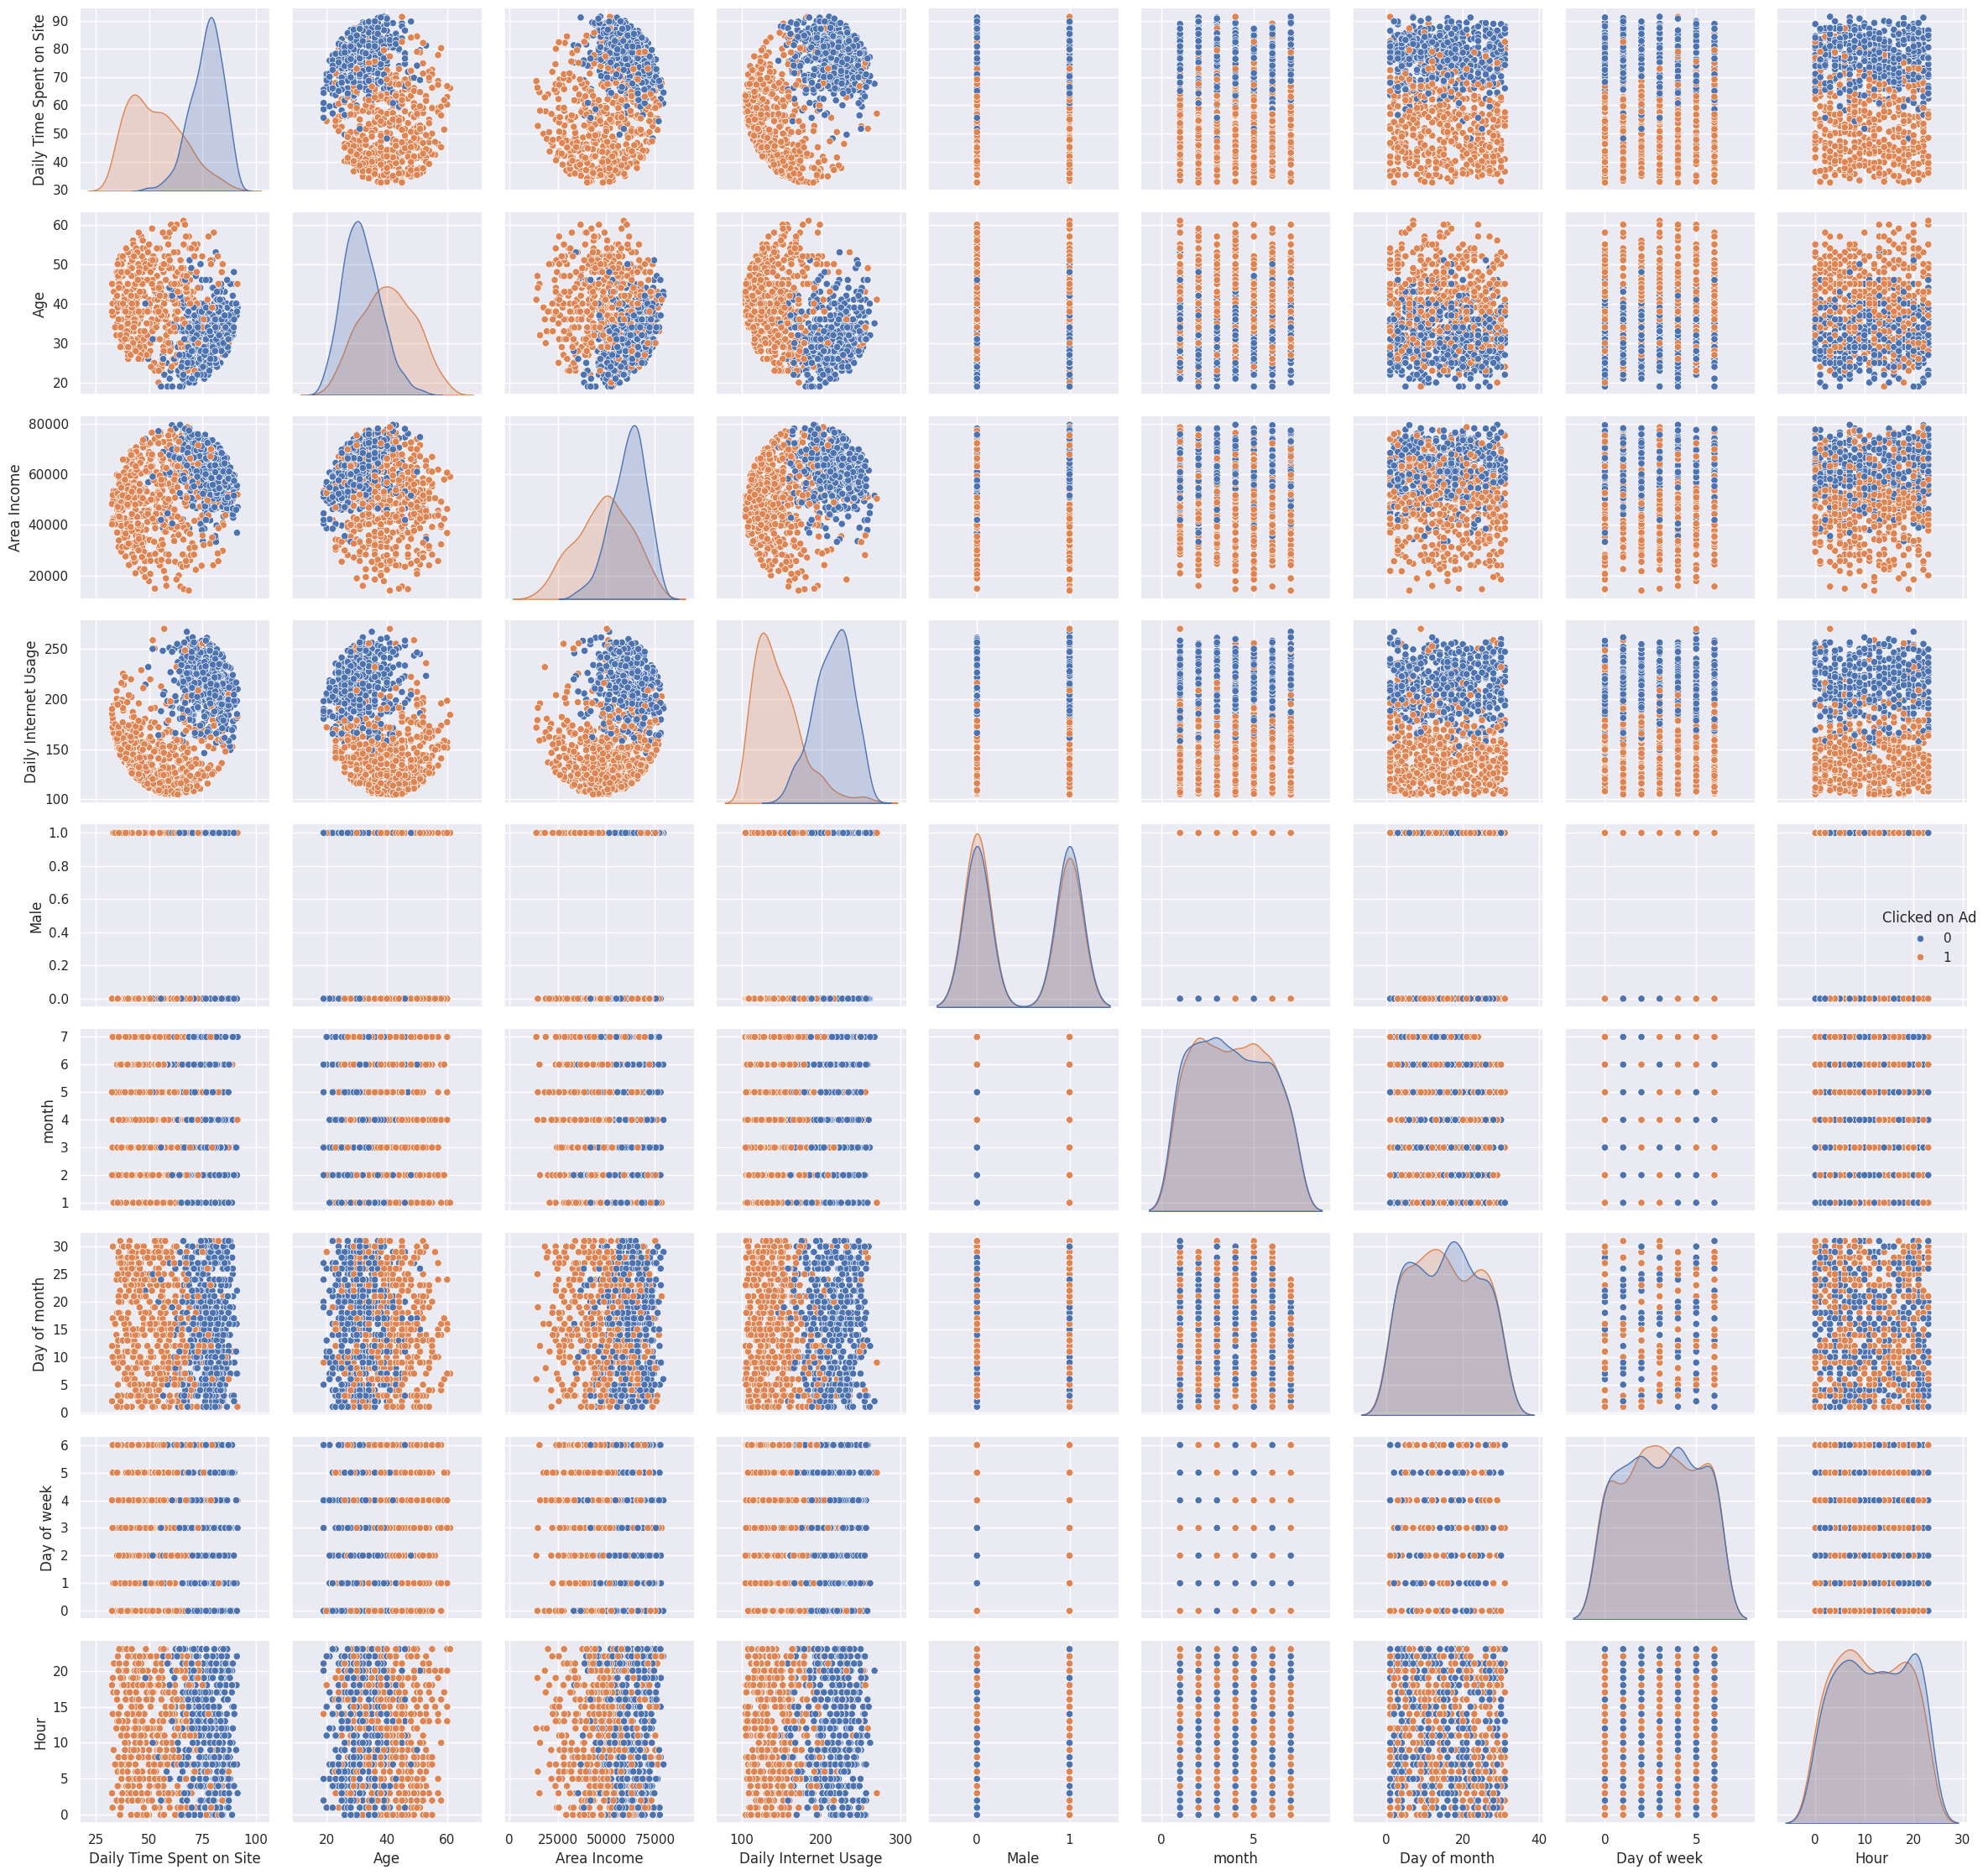

In [105]:
#creating pairplot
plt.figure(figsize=(10,6))
sns.pairplot(data=df, hue="Clicked on Ad")

plt.tight_layout()
plt.show()

In [11]:
#inspecting categorial columns statistics
cat_df = df[["Ad Topic Line","City","Country"]]
cat_df.describe(include="all")

,Ad Topic Line,City,Country
count,1000,1000,1000
unique,1000,969,237
top,Cloned 5thgeneration orchestration,Lisamouth,France
freq,1,3,9


In [12]:
#since the cardinality of the categorial feature's is high, dropping them for better training
df = df.drop(["Ad Topic Line","City","Country"], axis=1)

In [13]:
# splitting data to features and label
X = df.drop("Clicked on Ad", axis = 1)
y = df["Clicked on Ad"]


In [14]:
#splitting training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42)

In [15]:
#inspecting the shapes of the datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 9)
(200, 9)
(800,)
(200,)


# Decision tree

In [16]:
#initializing and training model
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
pred_clf = clf.predict(X_test)

In [17]:
#inspecting classification_report
print(classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        89
           1       0.91      0.95      0.93       111

    accuracy                           0.92       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.92      0.92      0.91       200



In [18]:
#inspecting confusion_matrix
print(confusion_matrix(y_test, pred_clf))

[[ 78  11]
 [  6 105]]


In [19]:
#creating param_grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [20]:
#creating GridSearchCV and training
clf_grid = GridSearchCV(estimator = clf, param_grid= param_grid, cv=5, scoring="accuracy")
clf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [21]:
#retriving best params and model
clf_best_model = clf_grid.best_estimator_
clf_best_params = clf_grid.best_params_

In [22]:
#checking best_params
print(clf_best_params)

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [23]:
#predicting with best model
pred_clf_best = clf_best_model.predict(X_test)

In [24]:
#inspecting classification report
print(classification_report(y_test, pred_clf_best))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92        89
           1       0.93      0.94      0.93       111

    accuracy                           0.93       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.93      0.92       200



In [25]:
#inspecting confusion_matrix
print(confusion_matrix(y_test, pred_clf_best))

[[ 81   8]
 [  7 104]]


In [26]:
#calculating positive probabilities
y_score = clf_best_model.predict_proba(X_test)[:, 1]

#calculating FPR, TPR and auc
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

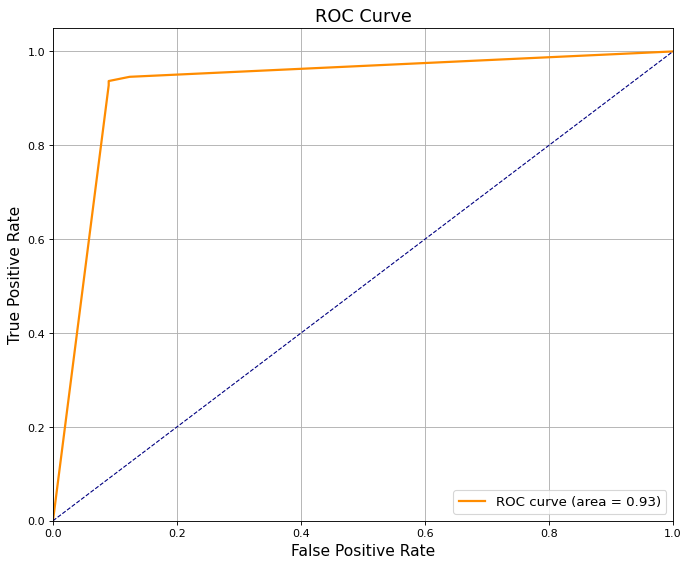

In [27]:
# Plot ROC curve
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)

plt.grid(True)

plt.show()

# Random forest

In [28]:
#initializing and training model
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)

In [29]:
#inspecting classification_report
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        89
           1       0.94      0.93      0.94       111

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



In [30]:
#inspecting confusion_matrix
print(confusion_matrix(y_test,pred_rfc))

[[ 83   6]
 [  8 103]]


In [31]:
#creating param_grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [32]:
#creating GridSearchCV and training
rfc_grid = GridSearchCV(estimator = rfc, param_grid= param_grid, cv=5, scoring="accuracy")
rfc_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [33]:
#retring best model and params
rfc_best_model = rfc_grid.best_estimator_
rfc_best_params = rfc_grid.best_params_

In [34]:
#inspecting best_params
print(rfc_best_params)

{'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [35]:
#predicing with the best model
pred_rfc_best_model = rfc_best_model.predict(X_test)

In [36]:
#inspecting classification_report
print(classification_report(y_test, pred_rfc_best_model))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        89
           1       0.94      0.92      0.93       111

    accuracy                           0.93       200
   macro avg       0.92      0.93      0.92       200
weighted avg       0.93      0.93      0.93       200



In [37]:
#inspecting confusion_matrix
print(confusion_matrix(y_test, pred_rfc_best_model))

[[ 83   6]
 [  9 102]]


In [38]:
#calculating positive probabilities
y_score = rfc_best_model.predict_proba(X_test)[:, 1]

#calculating FPR, TPR and auc
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

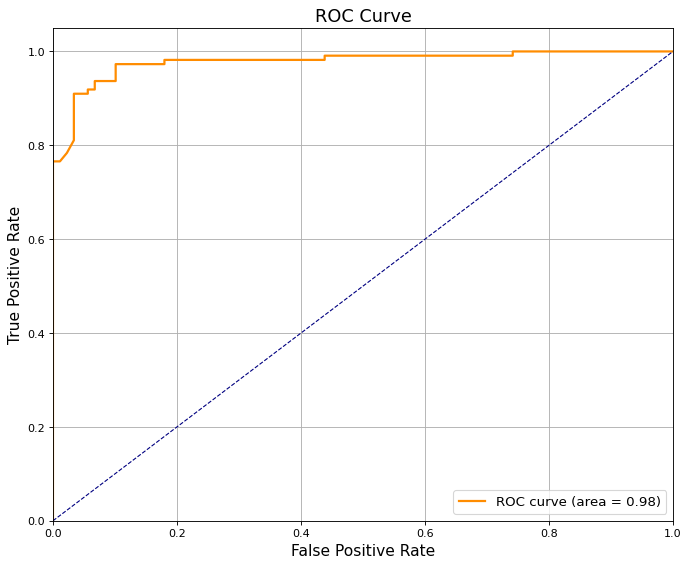

In [39]:
# Plot ROC curve
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)

plt.grid(True)

plt.show()

# Support vector

In [40]:
#initializing and training model
svm = svm.SVC()
svm.fit(X_train, y_train)
pred_svm = svm.predict(X_test)

In [41]:
#inspecting classification_report
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.60      0.84      0.70        89
           1       0.81      0.55      0.66       111

    accuracy                           0.68       200
   macro avg       0.71      0.70      0.68       200
weighted avg       0.72      0.68      0.68       200



In [42]:
#inspecting confusion_matrix
print(confusion_matrix(y_test, pred_svm))

[[75 14]
 [50 61]]


In [43]:
#creating param_grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 10],
    'degree': [2, 3, 4],
    'class_weight': [None, 'balanced']
}

In [44]:
#creating GridSearchCV and training
svm_grid = GridSearchCV(estimator = svm, param_grid= param_grid, cv=5, scoring="accuracy")
svm_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': [None, 'balanced'],
                         'degree': [2, 3, 4], 'gamma': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [45]:
#retring best model and params
svm_best_model = svm_grid.best_estimator_
svm_best_params = svm_grid.best_params_

In [46]:
#inspecting best_params
print(svm_best_params)

{'C': 0.1, 'class_weight': 'balanced', 'degree': 2, 'gamma': 0.1, 'kernel': 'linear'}


In [47]:
#predicing with the best model
pred_svm_best_model = svm_best_model.predict(X_test)

In [48]:
#inspecting classification_report
print(classification_report(y_test, pred_svm_best_model))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        89
           1       0.94      0.93      0.94       111

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



In [49]:
#inspecting confusion_matrix
print(confusion_matrix(y_test, pred_svm_best_model))

[[ 83   6]
 [  8 103]]


# KNN

In [51]:
#initializing and training model
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)

In [52]:
#inspecting classification_report
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.61      0.75      0.67        89
           1       0.76      0.61      0.68       111

    accuracy                           0.68       200
   macro avg       0.68      0.68      0.67       200
weighted avg       0.69      0.68      0.68       200



In [53]:
#inspecting confusion_matrix
print(confusion_matrix(y_test,pred_knn))

[[67 22]
 [43 68]]


In [54]:
#creating param_grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30],
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

In [55]:
#creating GridSearchCV and training
knn_grid = GridSearchCV(estimator = knn, param_grid= param_grid, cv=5, scoring="accuracy")
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30],
                         'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [56]:
#retring best model and params
knn_best_model = knn_grid.best_estimator_
knn_best_params = knn_grid.best_params_

In [57]:
#inspecting best_params
print(knn_best_params)

{'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [58]:
#predicing with the best model
pred_knn_best_model = knn_best_model.predict(X_test)

In [59]:
#inspecting classification_report
print(classification_report(y_test, pred_knn_best_model))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75        89
           1       0.83      0.70      0.76       111

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.75       200
weighted avg       0.77      0.76      0.76       200



In [60]:
#inspecting confusion_matrix
print(confusion_matrix(y_test, pred_knn_best_model))

[[73 16]
 [33 78]]


In [61]:
#calculating positive probabilities
y_score = knn_best_model.predict_proba(X_test)[:, 1]

#calculating FPR, TPR and auc
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

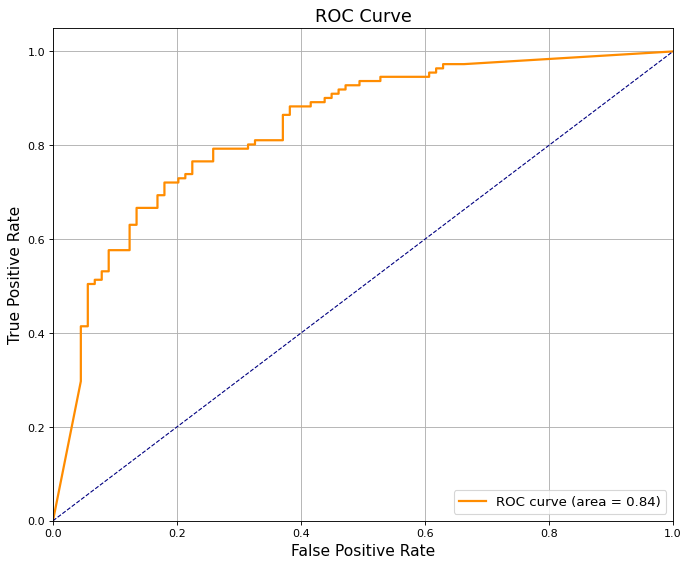

In [62]:
# Plot ROC curve
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)

plt.grid(True)

plt.show()

# Logistic regression

In [91]:
#initializing and training model
lr = lr = LogisticRegression()
lr.fit(X_train,y_train)
pred_lr = lr.predict(X_test)

In [92]:
#inspecting classification_report
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91        89
           1       0.97      0.86      0.91       111

    accuracy                           0.91       200
   macro avg       0.91      0.92      0.91       200
weighted avg       0.92      0.91      0.91       200



In [93]:
#inspecting confusion_matrix
print(confusion_matrix(y_test,pred_lr))

[[86  3]
 [15 96]]


In [94]:
#creating param_grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000,2000,3000]
}

In [95]:
#creating GridSearchCV and training
lr_grid = GridSearchCV(estimator = lr, param_grid= param_grid, cv=5, scoring="accuracy")
lr_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [1000, 2000, 3000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [96]:
#retring best model and params
lr_best_model = lr_grid.best_estimator_
lr_best_params = lr_grid.best_params_

In [97]:
#inspecting best_params
print(lr_best_params)

{'C': 100, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}


In [98]:
#predicing with the best model
pred_lr_best_model = lr_best_model.predict(X_test)

In [99]:
#inspecting classification_report
print(classification_report(y_test, pred_lr_best_model))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        89
           1       0.96      0.95      0.95       111

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



In [100]:
#inspecting confusion_matrix
print(confusion_matrix(y_test, pred_lr_best_model))

[[ 85   4]
 [  6 105]]


In [101]:
#calculating positive probabilities
y_score = lr_best_model.predict_proba(X_test)[:, 1]

#calculating FPR, TPR and auc
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

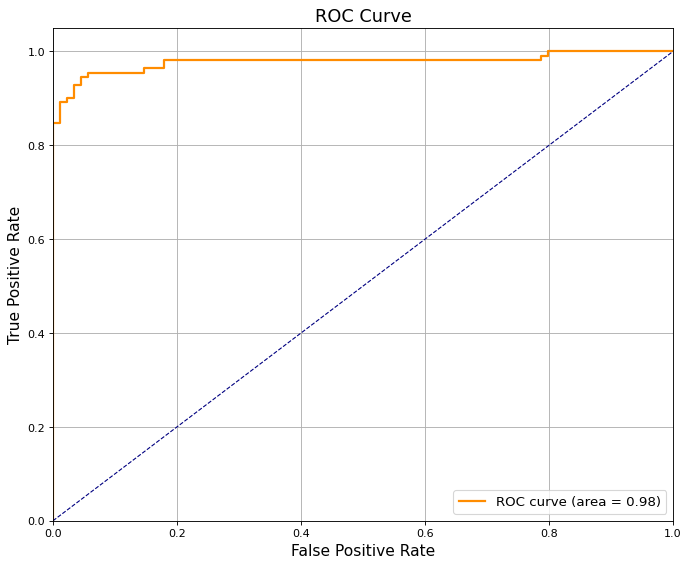

In [102]:
# Plot ROC curve
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)

plt.grid(True)

plt.show()